<a href="https://colab.research.google.com/github/chirag-ganguli/EVS-Project-SEM/blob/main/EVS_Study_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scientific Study of Climate Change on Earth's Surface Temperature

## Importing Dataset from Kaggle

In [ ]:
!mkdir ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download berkeleyearth/climate-change-earth-surface-temperature-data

climate-change-earth-surface-temperature-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/climate-change-earth-surface-temperature-data.zip

Archive:  /content/climate-change-earth-surface-temperature-data.zip
replace GlobalLandTemperaturesByCity.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: GlobalLandTemperaturesByCity.csv  
  inflating: GlobalLandTemperaturesByCountry.csv  
  inflating: GlobalLandTemperaturesByMajorCity.csv  
  inflating: GlobalLandTemperaturesByState.csv  
  inflating: GlobalTemperatures.csv  


## Part 1 - State-wise Global Land Temperature Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
global_temp = pd.read_csv("/content/GlobalLandTemperaturesByState.csv")

Analyze the imported Data

In [ ]:
global_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [ ]:
global_temp.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'State',
       'Country'],
      dtype='object')

In [ ]:
global_temp.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [ ]:
global_temp.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [ ]:
global_temp = global_temp.dropna(how='any',axis=0)
global_temp.shape

(620027, 5)

In [ ]:
global_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [ ]:
global_temp.columns=['Date','Avg_temp','Temp_uncertainty','State','Country']
global_temp.head()

,Date,Avg_temp,Temp_uncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [ ]:
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [ ]:
global_temp.describe

<bound method NDFrame.describe of               Date  Avg_temp  Temp_uncertainty     State Country
0       1855-05-01    25.544             1.171      Acre  Brazil
1       1855-06-01    24.228             1.103      Acre  Brazil
2       1855-07-01    24.371             1.044      Acre  Brazil
3       1855-08-01    25.427             1.073      Acre  Brazil
4       1855-09-01    25.675             1.014      Acre  Brazil
...            ...       ...               ...       ...     ...
645669  2013-04-01    15.710             0.461  Zhejiang   China
645670  2013-05-01    21.634             0.578  Zhejiang   China
645671  2013-06-01    24.679             0.596  Zhejiang   China
645672  2013-07-01    29.272             1.340  Zhejiang   China
645673  2013-08-01    29.202             0.869  Zhejiang   China

[620027 rows x 5 columns]>

In [ ]:
global_temp['Date']=pd.to_datetime(global_temp['Date'])
global_temp.set_index('Date',inplace=True)
global_temp.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=620027, freq=None)

In [ ]:
global_temp['Year']=global_temp.index.year

Visualize state-wise average temperature per year

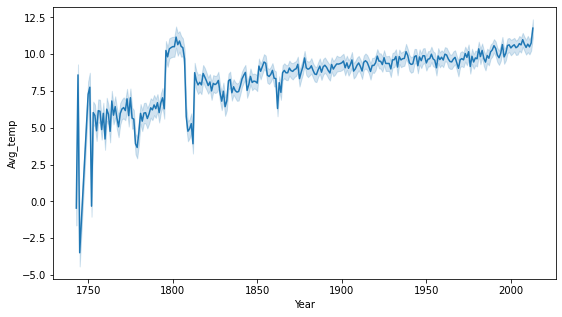

In [ ]:
plt.figure(figsize=(9,5))
sns.lineplot(x="Year",y="Avg_temp",data=global_temp)

In the above line plot, we can clearly infer that the average temperature is increasing every year. We can visulaize it properly using the below plot where we are trying to plot the graph with respect to the Average Temperature & Temperature Uncertainty every year.

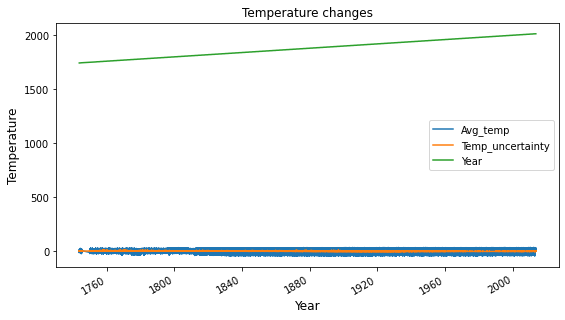

In [ ]:
global_temp.plot(title='Temperature changes',figsize=(9,5))
plt.ylabel("Temperature",fontsize=12)
plt.xlabel("Year",fontsize=12)
plt.legend()

Revise the global temperature to latest data from 1980-2020 & resample it based on mean of average temperature

In [ ]:
global_temp_latest=global_temp.loc['1980':'2020']
global_temp_latest.head()

,Avg_temp,Temp_uncertainty,State,Country,Year
Date,,,,,
1980-01-01,26.652,0.190,Acre,Brazil,1980
1980-02-01,26.495,0.495,Acre,Brazil,1980
1980-03-01,26.270,0.236,Acre,Brazil,1980
1980-04-01,26.430,0.201,Acre,Brazil,1980
1980-05-01,25.802,0.882,Acre,Brazil,1980


In [ ]:
global_temp_resample=global_temp_latest[['Avg_temp']].resample('A').mean()
global_temp_resample.head()

,Avg_temp
Date,
1980-12-31,9.689856
1981-12-31,10.366578
1982-12-31,9.837958
1983-12-31,10.259516
1984-12-31,9.724950


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series.

In [ ]:
from statsmodels.tsa.stattools import adfuller

print('Dickey Fuller Test Results:')

global_temp_test=adfuller(global_temp_resample.iloc[:,0].values,autolag='AIC')
global_temp_output=pd.Series(global_temp_test[0:4], index=['Test Statistic','p-value','Lags Used','Number of Obsevation Used'])
for key, value in global_temp_test[4].items():
    global_temp_output['Critical Value (%s)' %key]=value
print(global_temp_output)

Dickey Fuller Test Results:
Test Statistic               -0.728209
p-value                       0.839307
Lags Used                     2.000000
Number of Obsevation Used    31.000000
Critical Value (1%)          -3.661429
Critical Value (5%)          -2.960525
Critical Value (10%)         -2.619319
dtype: float64


Since your adfuller p-value is lower than a certain specified alpha (i.e.: 5%), then you may reject the null hypothesis (Ho), because the probability of getting a p-value as low as that by mere luck (random chance) is very unlikely.

Once the Ho is rejected, the alternative hypothesis (Ha) can be accepted, which in this case would be: the residue series is stationary.

In [ ]:
decomp_data=seasonal_decompose(global_temp_resample,freq=3)

Trend=decomp_data.trend
Seasonal=decomp_data.seasonal
Residual=decomp_data.resid

**Trend** is the overall direction of the data. **Seasonality** is a periodic component. And the residual is what's left over when the trend and seasonality have been removed. **Residuals** are random fluctuations which can be considered as a noise component.

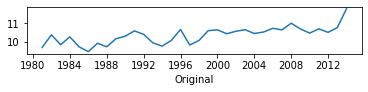

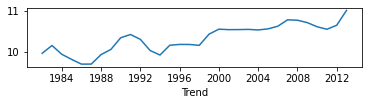

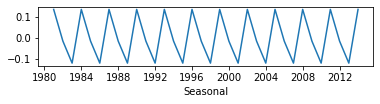

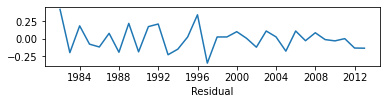

<Figure size 432x360 with 0 Axes>

In [ ]:
plt.subplot(411)
plt.plot(global_temp_resample)
plt.xlabel('Original')
plt.figure(figsize=(6,5))

plt.subplot(412)
plt.plot(Trend)
plt.xlabel('Trend')
plt.figure(figsize=(6,5))

plt.subplot(413)
plt.plot(Seasonal)
plt.xlabel('Seasonal')
plt.figure(figsize=(6,5))

plt.subplot(414)
plt.plot(Residual)
plt.xlabel('Residual')
plt.figure(figsize=(6,5))

plt.tight_layout()

In statistics, a **moving average** is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. It is also called a **moving mean or rolling mean** and is a type of finite impulse response filter. Variations include: simple, cumulative, or weighted forms. <br>
The **ewm() function** is used to provide exponential weighted functions.

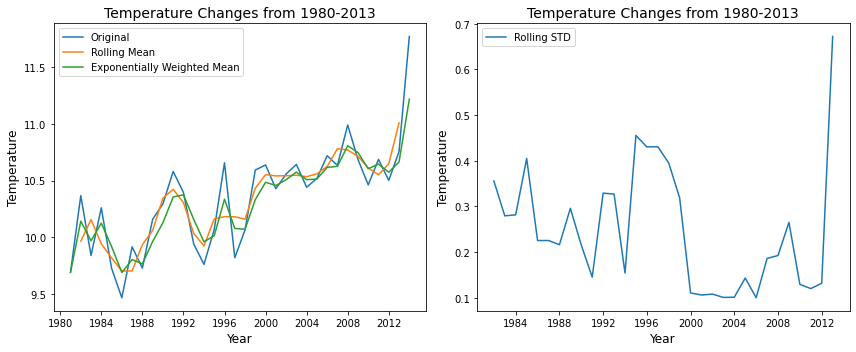

In [ ]:
rol_mean=global_temp_resample.rolling(window=3, center=True).mean()

ewm=global_temp_resample.ewm(span=3).mean()

rol_std=global_temp_resample.rolling(window=3, center=True).std()

fig, (ax1,ax2)=plt.subplots(1,2, figsize=(12,5))

ax1.plot(global_temp_resample,label='Original')
ax1.plot(rol_mean,label='Rolling Mean')
ax1.plot(ewm, label='Exponentially Weighted Mean')
ax1.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

ax2.plot(rol_std, label='Rolling STD')
ax2.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

A moving average helps cut down the amount of "noise" on a price chart. Look at the direction of the moving average to get a basic idea of which way the price is moving. If it is angled up, the price is moving up (or was recently) overall. <br>
However, moving averages can have different lengths, so one MA may indicate an uptrend in this case

In [ ]:
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)

print('Dickey-Fuller Test for the Rolling Mean:')
global_temp_test=adfuller(rol_mean.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(global_temp_test[0:4], index=['Test Statistic','p-value','Lags Used','Number of Obsevation Used'])
for key, value in global_temp_test[4].items():
    df_output['Critical Value (%s)' %key]=value
print(df_output)
print('')
print('Dickey-Fuller Test for the Exponential Weighted Mean:')
global_temp_test=adfuller(ewm.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(global_temp_test[0:4], index=['Test Statistic','p-value','Lags Used','Number of Obsevation Used'])
for key, value in global_temp_test[4].items():
    df_output['Critical Value (%s)' %key]=value
print(df_output)

Dickey-Fuller Test for the Rolling Mean:
Test Statistic                0.275101
p-value                       0.976173
Lags Used                     8.000000
Number of Obsevation Used    23.000000
Critical Value (1%)          -3.752928
Critical Value (5%)          -2.998500
Critical Value (10%)         -2.638967
dtype: float64

Dickey-Fuller Test for the Exponential Weighted Mean:
Test Statistic               -0.338693
p-value                       0.919843
Lags Used                     2.000000
Number of Obsevation Used    31.000000
Critical Value (1%)          -3.661429
Critical Value (5%)          -2.960525
Critical Value (10%)         -2.619319
dtype: float64


In general, the p-value here is of less than 5% in both Rolling Mean & Exponential Weighted Mean which means you can reject the null hypothesis that there is a unit root.

In [ ]:
diff_rol_mean=global_temp_resample-rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,Avg_temp
Date,
1981-12-31,0.401781
1982-12-31,-0.316726
1983-12-31,0.318708
1984-12-31,-0.091684
1985-12-31,-0.236199


In [ ]:
diff_ewm_mean=global_temp_resample-ewm
diff_ewm_mean.dropna(inplace=True)
diff_ewm_mean.head()

,Avg_temp
Date,
1980-12-31,0.000000
1981-12-31,0.225574
1982-12-31,-0.129877
1983-12-31,0.136118
1984-12-31,-0.192797


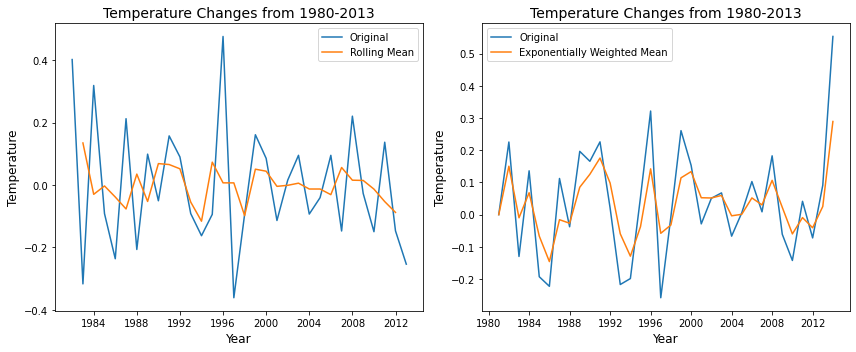

In [ ]:
df_rol_mean_diff = diff_rol_mean.rolling(window=3,center=True).mean()

df_ewm_diff=diff_ewm_mean.ewm(span=3).mean()

fig, (ax1,ax2)=plt.subplots(1,2, figsize=(12,5))

ax1.plot(diff_rol_mean,label='Original')
ax1.plot(df_rol_mean_diff,label='Rolling Mean')
ax1.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

ax2.plot(diff_ewm_mean, label='Original')
ax2.plot(df_ewm_diff,label='Exponentially Weighted Mean')
ax2.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

In **LHS**, we can see the trend differ with respect to the rolling mean which signifies a greater increment in average temperature fluctuation due to the change in the Climatic Conditions. <br>
In **RHS**, however, we have steaper fluctuation with respect to the Exponentially Weighter Mean of the Temperature changes. The primary purpose of the EWMA control chart is to detect small shifts from the process average or target.

In [ ]:
print('Dickey-Fuller Test for the differencing between the Original and Rolling Mean:')
dftest=adfuller(diff_rol_mean.iloc[:,0].values,autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Obsevation Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key]=value
print(dfoutput)
print('')
print('Dickey-Fuller Test for the Exponential Weighted Mean:')
dftest=adfuller(diff_ewm_mean.iloc[:,0].values,autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Obsevation Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key]=value
print(dfoutput)

Dickey-Fuller Test for the differencing between the Original and Rolling Mean:
Test Statistic              -7.007710e+00
p-value                      7.051586e-10
Lags Used                    1.000000e+00
Number of Obsevation Used    3.000000e+01
Critical Value (1%)         -3.669920e+00
Critical Value (5%)         -2.964071e+00
Critical Value (10%)        -2.621171e+00
dtype: float64

Dickey-Fuller Test for the Exponential Weighted Mean:
Test Statistic               -4.297446
p-value                       0.000449
Lags Used                     1.000000
Number of Obsevation Used    32.000000
Critical Value (1%)          -3.653520
Critical Value (5%)          -2.957219
Critical Value (10%)         -2.617588
dtype: float64


**plot_acf**: Plots the autocorrelation function & Plots lags on the horizontal and the correlations on vertical axis.
<br>
**plot_pacf**: Plots the partial autocorrelation function

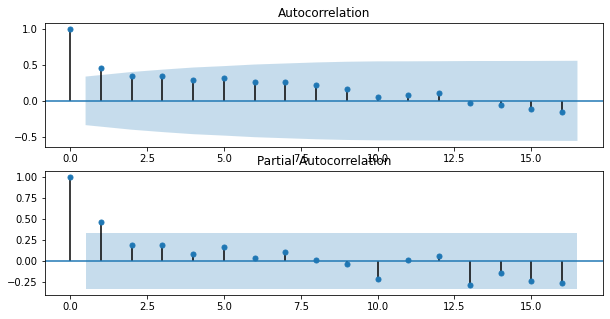

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

pyplot.figure(figsize=(10,5))
pyplot.subplot(211)
plot_acf(global_temp_resample, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(global_temp_resample,ax=pyplot.gca())
pyplot.show()

**Autocorrelation** is diagnosed using a correlogram (ACF plot) and can be tested using the Durbin-Watson test. An autocorrelation plot is designed to show whether the elements of a time series are positively correlated, negatively correlated, or independent of each other. Here in the left plot, it clearly show positive correlation upto 12.5 and negative correlation thereafter. <br>
In time series analysis, the **partial autocorrelation function (PACF)** gives the partial correlation of a stationary time series with its own lagged values, regressed the values of the time series at all shorter lags. It contrasts with the autocorrelation function, which does not control for other lags.

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt

## Part 2 - City-Wise Analysis on Land Temperature

In [ ]:
cities = pd.read_csv('/content/GlobalLandTemperaturesByCity.csv')
rio = cities.loc[cities['City'] == 'Amsterdam', ['dt','AverageTemperature']]
rio.columns = ['Date','Temp']
rio['Date'] = pd.to_datetime(rio['Date'])
rio.reset_index(drop=True, inplace=True)
rio.set_index('Date', inplace=True)

rio = rio.loc['1900':'2013-01-01']
rio = rio.asfreq('M', method='bfill')
rio.head()

,Temp
Date,
1900-01-31,2.396
1900-02-28,2.824
1900-03-31,7.386
1900-04-30,11.057
1900-05-31,15.745


Taking an example city Amsterdam for your scientific study in a smaller area to determine its's impact of climate change to the global temperature

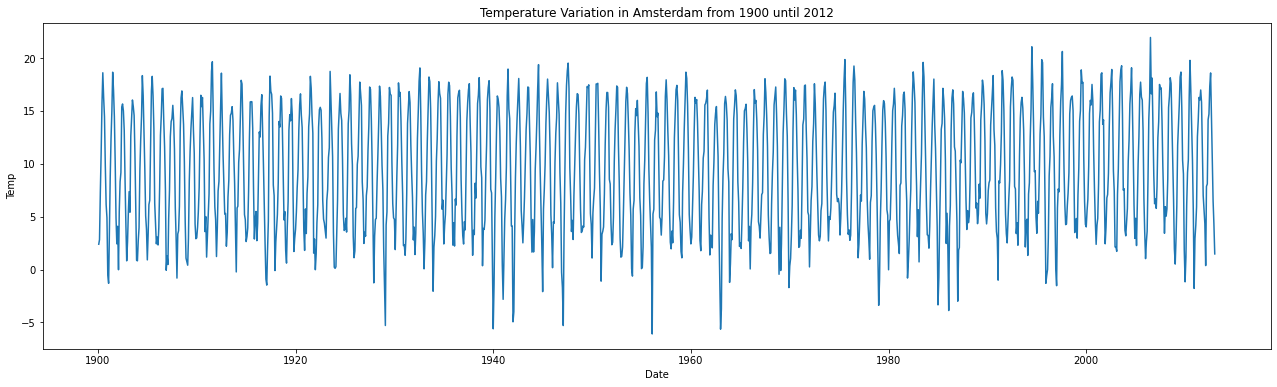

In [ ]:
plt.figure(figsize=(22,6))
sns.lineplot(x=rio.index, y=rio['Temp'])
plt.title('Temperature Variation in Amsterdam from 1900 until 2012')
plt.show()

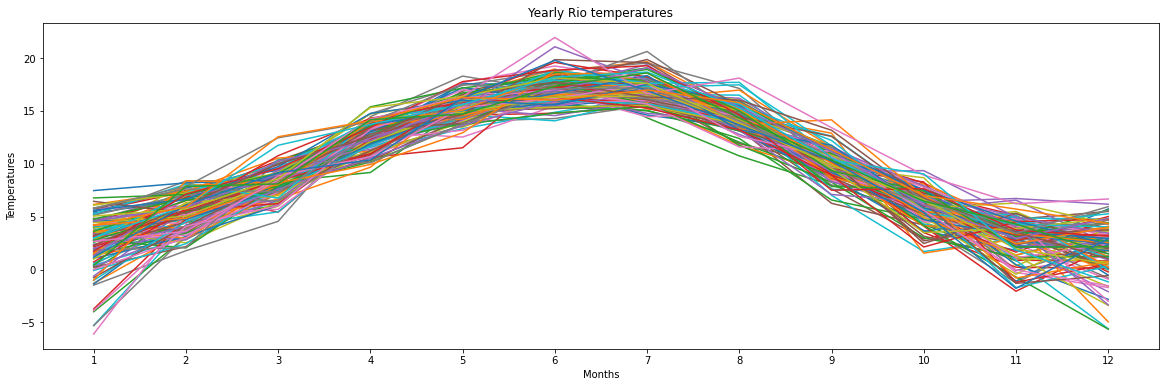

In [ ]:
rio['month'] = rio.index.month
rio['year'] = rio.index.year
pivot = pd.pivot_table(rio, values='Temp', index='month', columns='year', aggfunc='mean')
pivot.plot(figsize=(20,6))
plt.title('Yearly Rio temperatures')
plt.xlabel('Months')
plt.ylabel('Temperatures')
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.show()

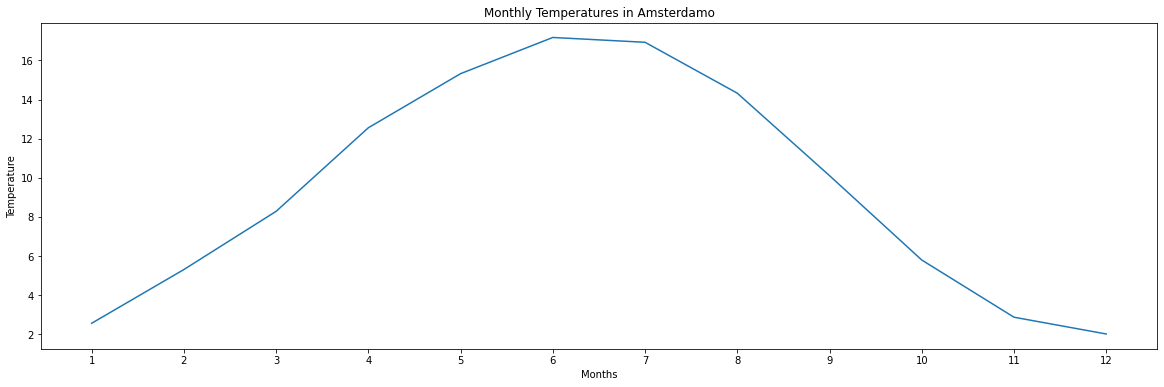

In [ ]:
monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.title('Monthly Temperatures in Amsterdamo')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1,13)])
plt.show()

We can clearly infer from the above graph that the temperature in Amsterdam increases rapidly for the 1st 6 months & gradually falls for the remaining 6 months

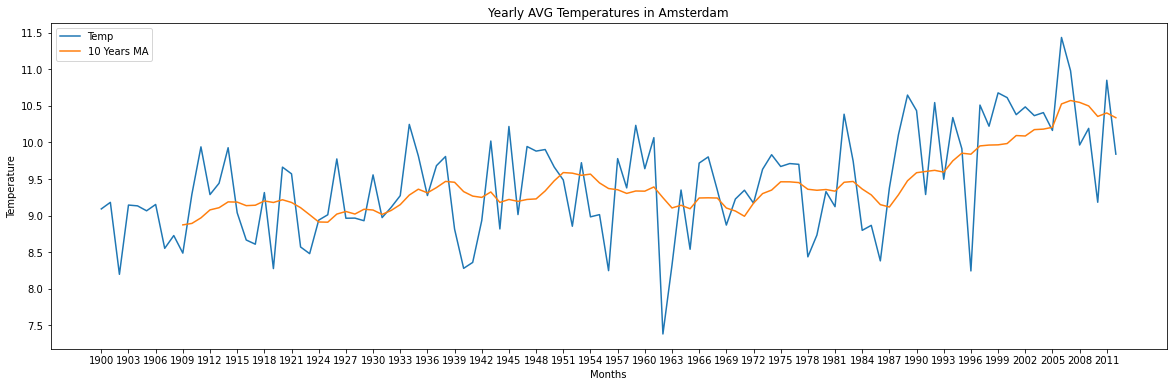

In [ ]:
year_avg = pd.pivot_table(rio, values='Temp', index='year', aggfunc='mean')
year_avg['10 Years MA'] = year_avg['Temp'].rolling(10).mean()
year_avg[['Temp','10 Years MA']].plot(figsize=(20,6))
plt.title('Yearly AVG Temperatures in Amsterdam')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1900,2012,3)])
plt.show()

If we now move to a larger scale where we plot the monthy temperature year-wise to generate the Yearly Average Temperature, we can see that the global temperature has risen comsiderably which proves that city-wise increase in Climate has affected the global temperature at a large scale

#### Creating a train-test-validation model to predict the climatic variation on effects to the global temperature

In [ ]:
train = rio[:-60].copy()
val = rio[-60:-12].copy()
test = rio[-12:].copy()

In [ ]:
baseline = val['Temp'].shift()
baseline.dropna(inplace=True)
baseline.head()

Date
2008-02-29     5.051
2008-03-31     5.732
2008-04-30     8.598
2008-05-31    15.322
2008-06-30    16.370
Freq: M, Name: Temp, dtype: float64

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.

In [ ]:
def measure_rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true,y_pred))

rmse_base = measure_rmse(val.iloc[1:,0],baseline)
print(f'The RMSE of the baseline that we will try to diminish is {round(rmse_base,4)} celsius degrees')

The RMSE of the baseline that we will try to diminish is 3.5697 celsius degrees


Results of Dickey-Fuller Test:
Test Statistic                   -4.4388
p-value                           0.0003
Lags Used                        23.0000
Number of Observations Used    1272.0000
Critical Value (1%)              -3.4355
Critical Value (5%)              -2.8638
Critical Value (10%)             -2.5680
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


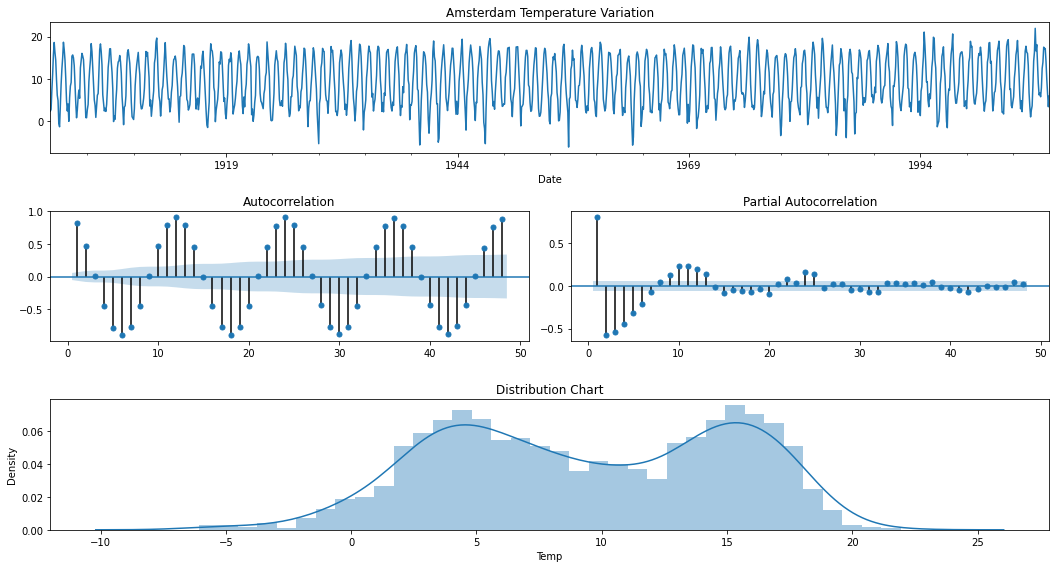

In [ ]:
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Amsterdam Temperature Variation')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe series seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe series isn't stationary")

check_stationarity(train['Temp'])

Results of Dickey-Fuller Test:
Test Statistic                  -12.0862
p-value                           0.0000
Lags Used                        23.0000
Number of Observations Used    1260.0000
Critical Value (1%)              -3.4356
Critical Value (5%)              -2.8638
Critical Value (10%)             -2.5680
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


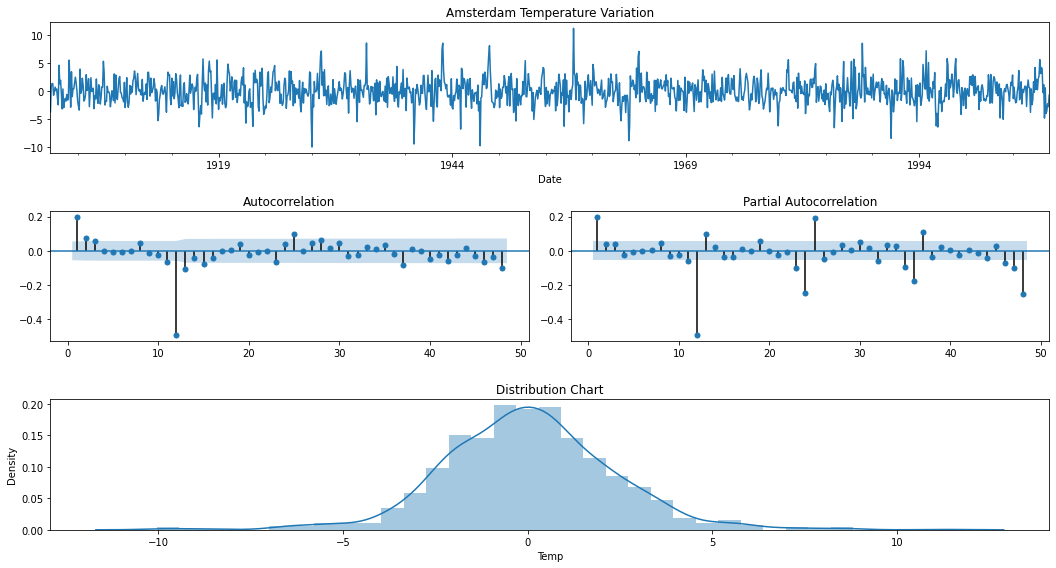

In [ ]:
check_stationarity(train['Temp'].diff(12).dropna())

The RMSE of the SARIMA(3,0,0),(0,1,1,12),'c' model was 1.5902 celsius degrees
It's a decrease of -55.45% in the RMSE


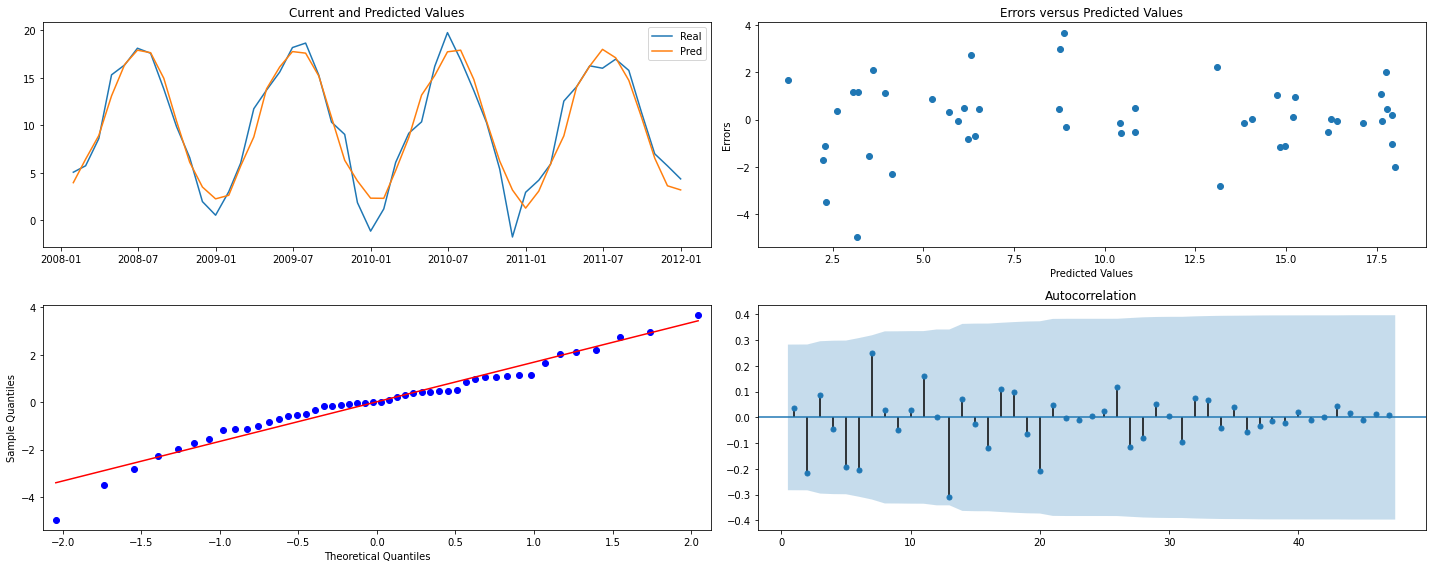

Date
1900-01-31     2.396
1900-02-28     2.824
1900-03-31     7.386
1900-04-30    11.057
1900-05-31    15.745
Freq: M, Name: Temp, dtype: float64

In [ ]:
def walk_forward(training_set, validation_set, params):
    history = [x for x in training_set.values]
    prediction = list()
    
    pdq, PDQS, trend = params
    for week in range(len(validation_set)):
        model = sm.tsa.statespace.SARIMAX(history, order=pdq, seasonal_order=PDQS, trend=trend)
        result = model.fit(disp=False)
        yhat = result.predict(start=len(history), end=len(history))
        prediction.append(yhat[0])
        history.append(validation_set[week])
        
    return prediction

val['Pred'] = walk_forward(train['Temp'], val['Temp'], ((3,0,0),(0,1,1,12),'c'))

rmse_pred = measure_rmse(val['Temp'], val['Pred'])

print(f"The RMSE of the SARIMA(3,0,0),(0,1,1,12),'c' model was {round(rmse_pred,4)} celsius degrees")
print(f"It's a decrease of {round((rmse_pred/rmse_base-1)*100,2)}% in the RMSE")

val['Error'] = val['Temp'] - val['Pred']

def plot_error(data, figsize=(20,8)):
    plt.figure(figsize=figsize)
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,0))
    ax4 = plt.subplot2grid((2,2), (1,1))
    
    ax1.plot(data.iloc[:,0:2])
    ax1.legend(['Real','Pred'])
    ax1.set_title('Current and Predicted Values')
    
    ax2.scatter(data.iloc[:,1], data.iloc[:,2])
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Errors')
    ax2.set_title('Errors versus Predicted Values')
    
    sm.graphics.qqplot(data.iloc[:,2], line='r', ax=ax3)
    plot_acf(data.iloc[:,2], lags=(len(data.iloc[:,2])-1),zero=False, ax=ax4)
    plt.tight_layout()
    plt.show()

val.drop(['month','year'], axis=1, inplace=True)
val.head()

plot_error(val)

future = pd.concat([train['Temp'], val['Temp']])
future.head()

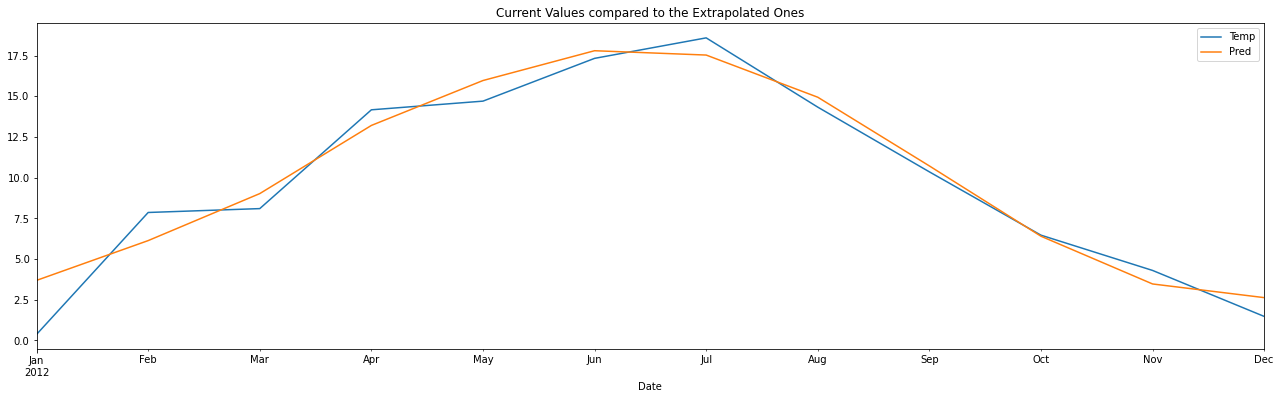

In [ ]:
model = sm.tsa.statespace.SARIMAX(future, order=(3,0,0), seasonal_order=(0,1,1,12), trend='c')
result = model.fit(disp=False)

test['Pred'] = result.predict(start=(len(future)), end=(len(future)+13))

test[['Temp', 'Pred']].plot(figsize=(22,6))
plt.title('Current Values compared to the Extrapolated Ones')
plt.show()

## Part 3 - Analysis on the entire Global Temperature Variation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
import datetime

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
global_temp = pd.read_csv('/content/GlobalTemperatures.csv',index_col='dt')

In [ ]:
global_temp = global_temp[global_temp['LandAndOceanAverageTemperature'].notnull()]

In [ ]:
global_temp.index = pd.to_datetime(global_temp.index, format='%Y-%m-%d')

**Ocean** currents act as conveyer belts of warm and cold water, sending heat toward the polar regions and helping tropical areas cool off, thus influencing both weather and climate. <br>
**Land** areas also absorb some sunlight, and the atmosphere helps to retain heat that would otherwise quickly radiate into space after sunset.

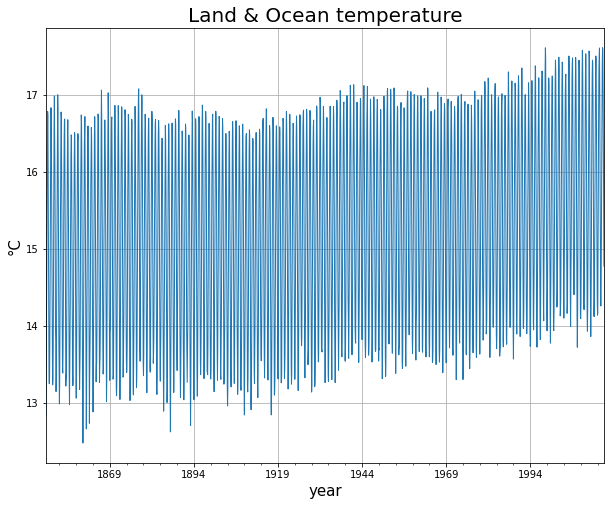

In [ ]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
global_temp["LandAndOceanAverageTemperature"].plot(linewidth=1)
plt.title('Land & Ocean temperature', fontsize=20)
plt.xlabel('year', fontsize=15)
plt.ylabel('°C', fontsize=15)
plt.grid(True)

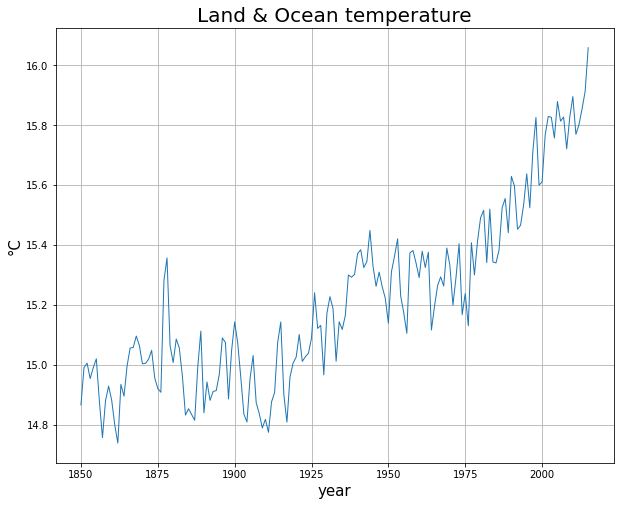

In [ ]:
avgTemp = global_temp.groupby(global_temp.index.year).mean()
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
avgTemp["LandAndOceanAverageTemperature"].plot(linewidth=1)
plt.title('Land & Ocean temperature', fontsize=20)
plt.xlabel('year', fontsize=15)
plt.ylabel('°C', fontsize=15)
plt.grid(True)

Increasing ocean temperatures affect marine species and ecosystems. There is likely to be an increase in mean global ocean temperature of 1-4 deg C by 2100. <br>
The primary cause of rising SST levels worldwide is climate warming due to excessive amounts of greenhouse gases being released into the atmosphere. Heat from the warming atmosphere raises the temperature of the sea surface. Water expands as it warms and the increased volume causes sea level rise.

In [ ]:
meanTemp = global_temp["LandAndOceanAverageTemperature"].mean()
global_temp["LandAndOceanAverageTemperatureDelta"] = global_temp["LandAndOceanAverageTemperature"] - meanTemp

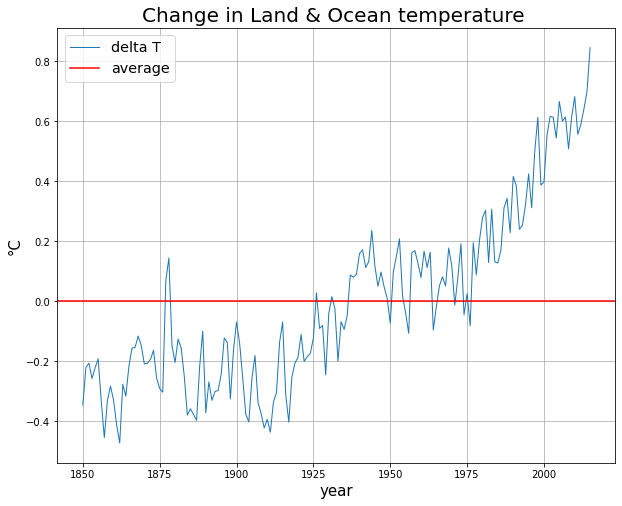

In [ ]:
avgTemp = global_temp.groupby(global_temp.index.year).mean()
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
avgTemp["LandAndOceanAverageTemperatureDelta"].plot(linewidth=1, label ='delta T')
plt.axhline(y=0, color='r', linestyle='-', label = 'average')
plt.title('Change in Land & Ocean temperature ', fontsize=20)
plt.legend(fontsize='x-large')
plt.xlabel('year', fontsize=15)
plt.ylabel('°C', fontsize=15)
plt.grid(True)

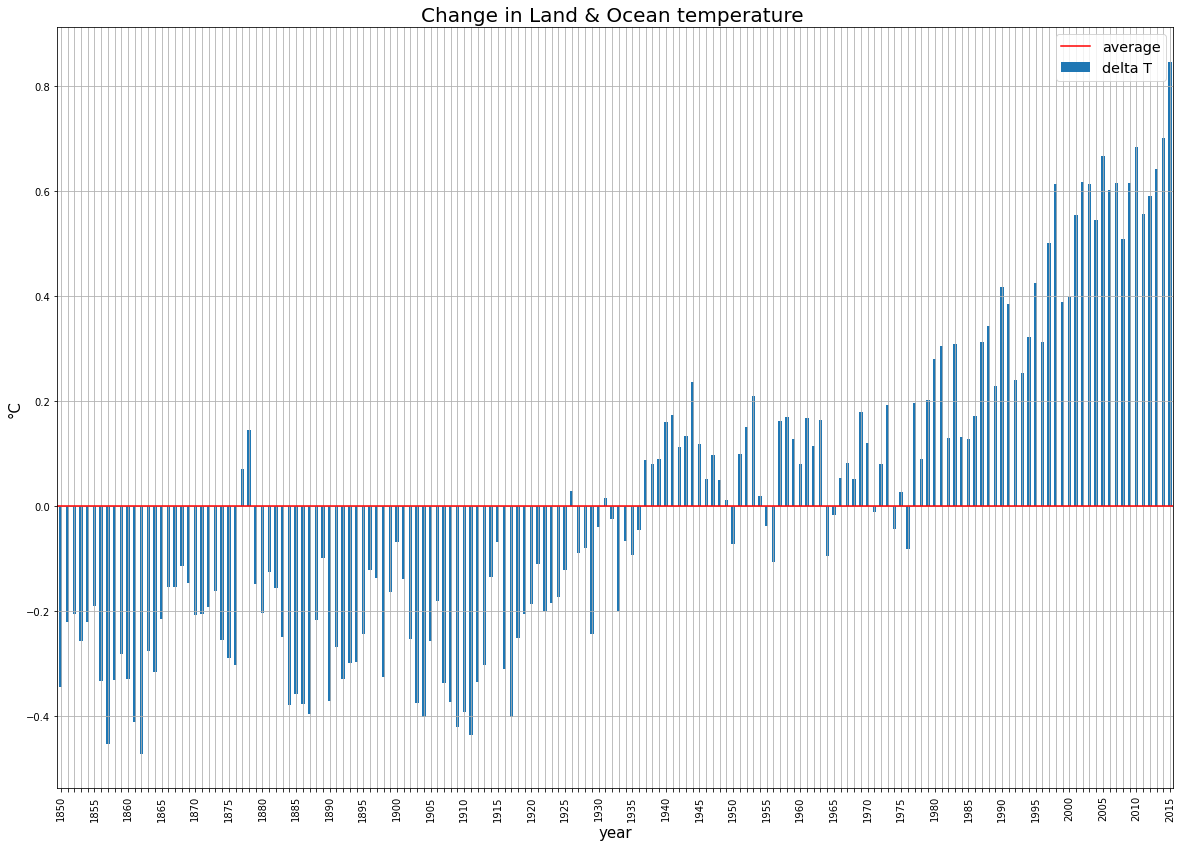

In [ ]:
avgTemp = global_temp.groupby(global_temp.index.year).mean()
fig_dims = (20, 14)
fig, ax = plt.subplots(figsize=fig_dims)
avgTemp["LandAndOceanAverageTemperatureDelta"].plot.bar(linewidth=1, label ='delta T')
plt.axhline(y=0, color='r', linestyle='-', label = 'average')
plt.title('Change in Land & Ocean temperature ', fontsize=20)
plt.legend(fontsize='x-large')

for i, t in enumerate(ax.get_xticklabels()):
    if (i % 5) != 0:
        t.set_visible(False)
plt.xlabel('year', fontsize=15)
plt.ylabel('°C', fontsize=15)
plt.grid(True)

The distribution of excess heat in the ocean is not uniform, with the greatest ocean warming occurring in the Southern Hemisphere and contributing to the subsurface melting of Antarctic ice shelves. The ocean’s ability to absorb excess heat has shielded humans from even more rapid changes in climate. Without this oceanic buffer, global temperatures would have risen much more than they have done to date. IPCC’s Fourth Assessment Report published in 2007 estimated that the Earth had experienced a warming of 0.55°C since the 1970s. According to an analysis by the Grantham Institute, if the same amount of heat that has gone into the top 2,000 m of the ocean between 1955 and 2010 had gone into the lower 10 km of the atmosphere, the Earth would have seen a warming of 36°C.

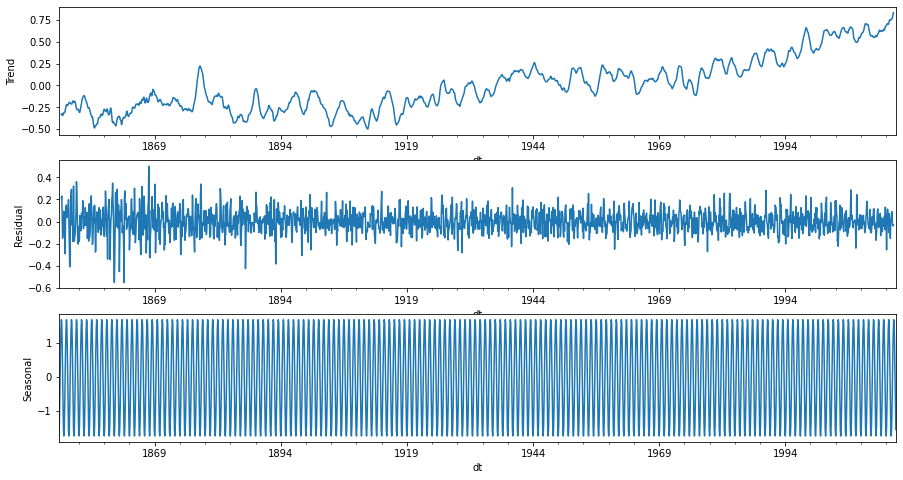

In [ ]:
decomposition = sm.tsa.seasonal_decompose(global_temp["LandAndOceanAverageTemperatureDelta"], model='additive')
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
decomposition.trend.plot(ax=ax1)
ax1.set_ylabel('Trend')
decomposition.resid.plot(ax=ax2)
ax2.set_ylabel('Residual')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
plt.show()

In [ ]:
series = pd.DataFrame(data=global_temp['LandAndOceanAverageTemperatureDelta'])
series.index = global_temp.index

Auto ARIMA takes into account the AIC and BIC values generated to determine the best combination of parameters. AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) values are estimators to compare models. The lower these values, the better is the model.

In [ ]:
model = auto_arima(series['LandAndOceanAverageTemperatureDelta'], 
                       start_p=1,
                       start_q=1,
                       max_p=3,
                       max_q=3,
                       start_P=1,
                       start_Q=1,
                       max_P=2,
                       max_Q=2,
                       m=12,
                       seasonal=True,
                       d=1,
                       D=1,
                       trend = 'ct',
                       test = 'adf',
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=-2298.081, Time=21.45 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-1171.890, Time=2.37 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-1913.215, Time=10.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-2341.233, Time=16.06 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-1491.875, Time=5.85 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-2251.439, Time=19.83 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-2367.718, Time=39.47 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-2370.128, Time=45.13 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=-2343.297, Time=51.11 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=-2219.171, Time=39.89 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=-2053.837, Time=35.05 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=-2412.662, Time=48.75 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=-2408.950, Time=43.18 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=-2387.719, Time=54.

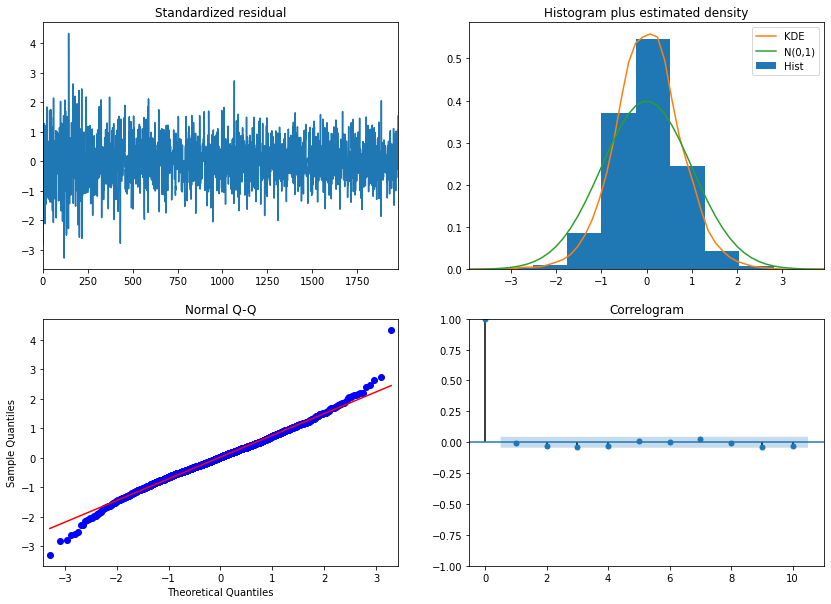

In [ ]:
model.plot_diagnostics(figsize=(14,10))
plt.show()

SARIMAX (Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors) is an updated version of the ARIMA model. ARIMA includes an autoregressive integrated moving average, while SARIMAX includes seasonal effects and eXogenous factors with the autoregressive and moving average component in the model.

In [ ]:
mod = sm.tsa.SARIMAX(series['LandAndOceanAverageTemperatureDelta'], order=(0, 1, 3), seasonal_order=(1,1,[1, 2],12), trend='ct')
# Estimate the parameters
res = mod.fit()

print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                        SARIMAX Results                                        
Dep. Variable:     LandAndOceanAverageTemperatureDelta   No. Observations:                 1992
Model:             SARIMAX(0, 1, 3)x(1, 1, [1, 2], 12)   Log Likelihood                1228.916
Date:                                 Wed, 11 Aug 2021   AIC                          -2439.831
Time:                                         10:25:37   BIC                          -2389.518
Sample:                                     01-01-1850   HQIC                         -2421.348
                                          - 12-01-2015                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0016      0.001     -1.476      0.140      -0.004       0

In [ ]:
startDate = series.index[0]
endDate = series.index[-1]
predicted = res.predict(start=startDate, end=endDate)
series['LandAndOceanAverageTemperaturePredictions'] = predicted

get_forecast to get the Out-of-sample forecasts and prediction intervals

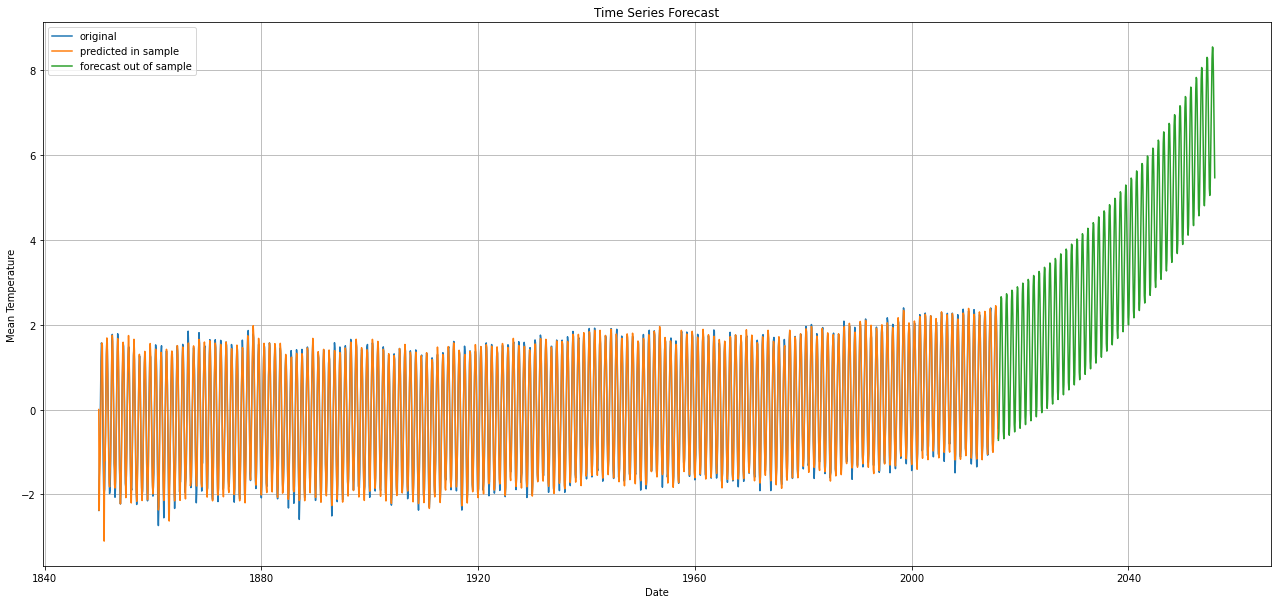

In [ ]:
nbStep = 12*40
forecast = res.get_forecast(steps=nbStep)

forecast = forecast.summary_frame()

forecasts = pd.DataFrame(columns = ['LandAndOceanAverageTemperaturePredictions','LandAndOceanAverageTemperaturePredictionsUpper','LandAndOceanAverageTemperaturePredictionsLower'])
forecasts['LandAndOceanAverageTemperaturePredictions'] = forecast['mean']
forecasts['LandAndOceanAverageTemperaturePredictionsUpper'] = forecast['mean_ci_upper']
forecasts['LandAndOceanAverageTemperaturePredictionsLower'] = forecast['mean_ci_lower']
forecasts.index = forecast.index

plt.figure(figsize=(22,10))
plt.plot(series.index,series['LandAndOceanAverageTemperatureDelta'],label = "original")
plt.plot(series['LandAndOceanAverageTemperaturePredictions'],label = "predicted in sample")
plt.plot(forecasts['LandAndOceanAverageTemperaturePredictions'],label = "forecast out of sample")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.grid(True)
plt.show()

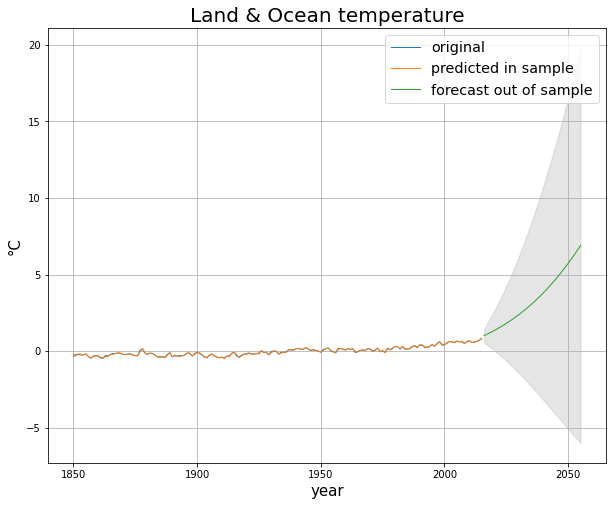

In [ ]:
avgTemp = series.groupby(series.index.year).mean()
avgTempPred = forecasts.groupby(forecasts.index.year).mean()
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
avgTemp["LandAndOceanAverageTemperatureDelta"].plot(linewidth=1, label='original')
avgTemp["LandAndOceanAverageTemperaturePredictions"].plot(linewidth=1, label='predicted in sample')
avgTempPred["LandAndOceanAverageTemperaturePredictions"].plot(linewidth=1, label='forecast out of sample')
ax.fill_between(avgTempPred.index, avgTempPred['LandAndOceanAverageTemperaturePredictionsLower'], avgTempPred['LandAndOceanAverageTemperaturePredictionsUpper'], color='k', alpha=0.1);
plt.title('Land & Ocean temperature', fontsize=20)
plt.xlabel('year', fontsize=15)
plt.ylabel('°C', fontsize=15)
plt.legend(fontsize='x-large')
plt.grid(True)